<a href="https://colab.research.google.com/github/yashmittal-ym/CODEFORCES-AIO/blob/master/AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "dwivediabhishek1998"
os.environ['KAGGLE_KEY'] = "1f1a04f5e87a8393dbc1f82a387dcfac"


In [2]:
!kaggle datasets download -d rpaguirre/tesla-stock-price

  0% 0.00/33.7k [00:00<?, ?B/s]
100% 33.7k/33.7k [00:00<00:00, 27.2MB/s]


In [3]:
from zipfile import ZipFile

In [4]:
with ZipFile('/content/tesla-stock-price.zip', 'r') as zipObj:
   zipObj.extractall()

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('/content/Tesla.csv - Tesla.csv.csv')
df.describe(include='all')

,Date,Open,High,Low,Close,Volume,Adj Close
count,1692,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
unique,1692,NaN,NaN,NaN,NaN,NaN,NaN
top,5/14/2013,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,NaN,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,NaN,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,NaN,30.000000,30.650000,29.214999,29.884999,1.194350e+06,29.884999
50%,NaN,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,NaN,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503


In [7]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [8]:
df['Date'] = pd.to_datetime(df['Date'])


In [9]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

In [10]:
df = df.drop('Volume', axis=1)
df = df.drop('Adj Close', axis=1)
y = df['Close']
x = df.drop('Close', axis=1)


In [11]:
x.head()

,Date,Open,High,Low
0,2010-06-29,19.000000,25.00,17.540001
1,2010-06-30,25.790001,30.42,23.299999
2,2010-07-01,25.000000,25.92,20.270000
3,2010-07-02,23.000000,23.10,18.709999
4,2010-07-06,20.000000,20.00,15.830000


In [12]:
y.head()

0    23.889999
1    23.830000
2    21.959999
3    19.200001
4    16.110001
Name: Close, dtype: float64

In [13]:
train = df[0:1200]
valid = df[1200:]

x_train = train.iloc[:,[1,2,3]]
y_train = train.iloc[:,4]
date_train=train.iloc[:,0]
x_valid = valid.iloc[:,[1,2,3]]
y_valid = valid.iloc[:,4]
date_valid=valid.iloc[:,0]

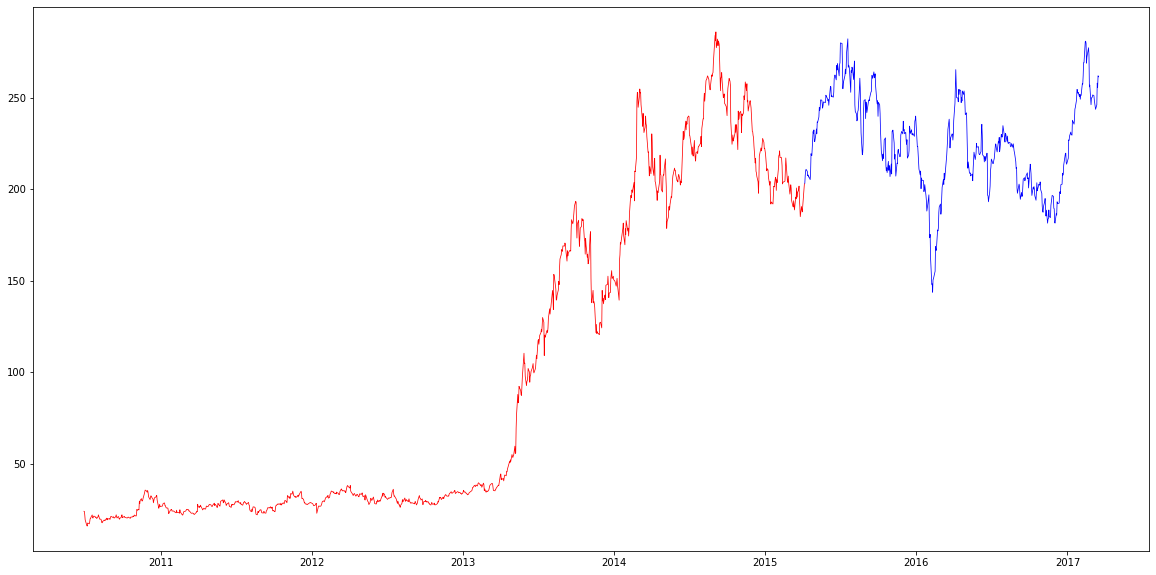

In [14]:
f, ax = plt.subplots(1, 1, figsize = (20, 10))
ax.plot(date_train, y_train, color = 'red', linewidth='0.75')
ax.plot(date_valid, y_valid, color = 'blue', linewidth='0.75')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)
pred = reg.predict(x_valid)

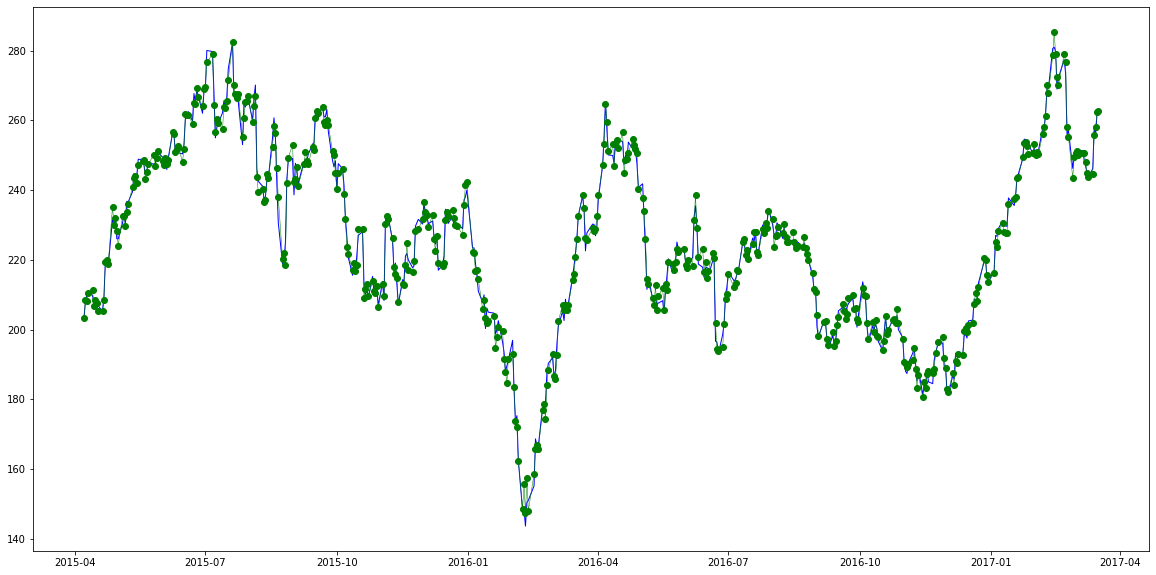

In [16]:
f, af = plt.subplots(1, 1, figsize = (20, 10))
# af.plot(date_train, y_train, color = 'red', linewidth='0.75')
af.plot(date_valid, y_valid, color = 'blue',linewidth='1')
af.plot(date_valid, pred, color='green', marker='o', linewidth=0.5)
plt.show()

In [17]:
x_valid.values[0,:]

array([202.509995, 205.059998, 201.139999])

In [18]:
prediction = reg.predict([[202.509995, 205.059998, 201.139999]])

In [19]:
original = y_valid.values[0]

In [20]:
print('original: ', original , 'and predicted: ', prediction[0])

original:  203.25 and predicted:  203.39819676743264


The predicted and given values are almost same